# Exercise 2 Egor Gordeev
# Part I
## Generate a white noise process $\eta_i$
As a generator for normal distributed numbers you can use from the numpy library random.normal:  
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [30]:
import numpy as np
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot

In [31]:
# MATPLOTLIB SETTINGS
# currently installed theme will be used to
# set plot style if no arguments provided
#jtplot.style()
#jtplot.style(theme='chesterish')
# set plot fonts sizes for all pictures
import matplotlib as mpl
mpl.rc('axes', labelsize=14,titlesize=18)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [32]:
dist_centre=0
n_draws=1000
std=3
WN=np.random.normal(loc=dist_centre,size=n_draws,scale=std)

(array([ 1.,  0.,  1.,  1.,  1.,  5.,  4.,  2.,  5.,  8.,  5.,  9., 13.,
        18., 17., 29., 21., 23., 25., 29., 37., 42., 48., 46., 60., 56.,
        47., 44., 53., 30., 33., 34., 37., 30., 36., 19., 21., 25., 20.,
        16., 15.,  7.,  7.,  6.,  6.,  2.,  2.,  1.,  1.,  2.]),
 array([-9.36582554, -9.00994209, -8.65405864, -8.29817519, -7.94229174,
        -7.58640828, -7.23052483, -6.87464138, -6.51875793, -6.16287448,
        -5.80699103, -5.45110757, -5.09522412, -4.73934067, -4.38345722,
        -4.02757377, -3.67169032, -3.31580686, -2.95992341, -2.60403996,
        -2.24815651, -1.89227306, -1.53638961, -1.18050615, -0.8246227 ,
        -0.46873925, -0.1128558 ,  0.24302765,  0.5989111 ,  0.95479456,
         1.31067801,  1.66656146,  2.02244491,  2.37832836,  2.73421181,
         3.09009527,  3.44597872,  3.80186217,  4.15774562,  4.51362907,
         4.86951252,  5.22539598,  5.58127943,  5.93716288,  6.29304633,
         6.64892978,  7.00481323,  7.36069669,  7.71658014,

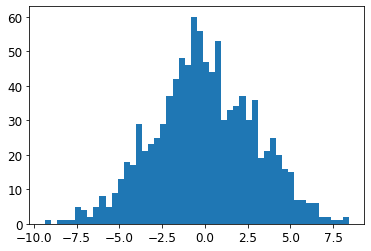

In [4]:
plt.hist(WN,bins=50)

In [34]:
# ---------------------
# When you want to see nice results you very often have to take much more realisations
# ---------------------
Example=np.random.normal(loc=dist_centre,size=int(1e8),scale=std)

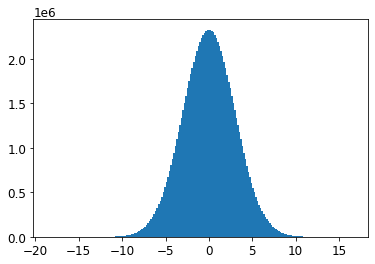

In [38]:
plt.hist(Example,bins=200)
plt.show()

## (ii) Derive the random walk process x and plot it
as $x_j = x_0 + \sum_i^n \eta_i$ and plot the process.  
with $x_0 = 0$

In [5]:
def get_RW_realization(x0,dist_centre,RW_nelements):
    # create empty array
    walk_arr=np.zeros(RW_nelements)
    walk_arr[0]=x0
    # fill the array
    for i in range(1,RW_nelements):
        walk_arr[i]=walk_arr[i-1]+np.random.normal(loc=dist_centre,scale=std)
    
    return walk_arr

In [6]:
RW_realization=get_RW_realization(x0=0,dist_centre=0,RW_nelements=1000)

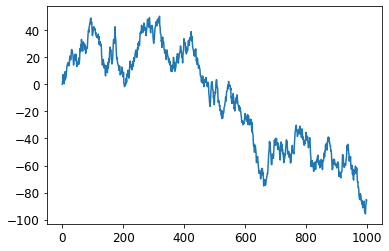

In [7]:
plt.plot(RW_realization)

Lets iterate!

In [8]:
# ---------------------------------------------
# Slooooowwwwwww, you can do it better, i know ;)
# But it is absolutly correct, so no worry
# --------------------------------------------
n_realizations=200
RW_nelements=20000
realizations_arr=np.ndarray([n_realizations,RW_nelements])

for realization in range(n_realizations):
    realizations_arr[realization]=get_RW_realization(x0=0,dist_centre=0,RW_nelements=RW_nelements)
#     realizations_list.append(get_RW_realization(x0=0,dist_centre=0,RW_nelements=1000))

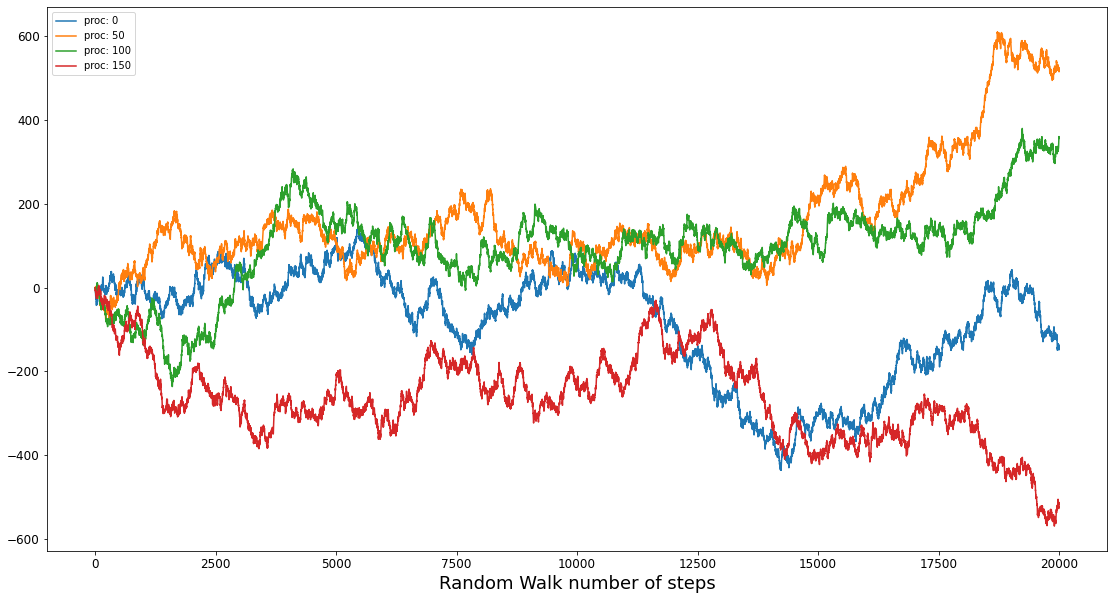

In [9]:
# ------------------------------------
# If you can see anything, why you should plot it?
# ---------------------------------------
fig= plt.figure(figsize=(19,10))
for i in range(0,n_realizations,50):
    lbl = 'proc: '+str(i)
    plt.plot(realizations_arr[i],label=lbl)
plt.legend()
plt.xlabel("Random Walk number of steps",fontsize=18);

## (iii) Estimation of moments
In order to be able to estimate the moments, we need to generate a sample of
random walk processes (e.g. of size 500) and derive estimates of expectation
and variance at each time step.

generate 100 realization, calc exp value and variance and plot it

In [10]:
means=[]
variances=[]
for timestep in range(RW_nelements):
    mean=np.mean(realizations_arr[:,timestep])
    mean_deviations=(realizations_arr[:,timestep]-mean)
    varaince=np.mean(mean_deviations**2)
    means.append(mean)
    variances.append(varaince)

Text(0.5, 0, 'Random Walk number of steps')

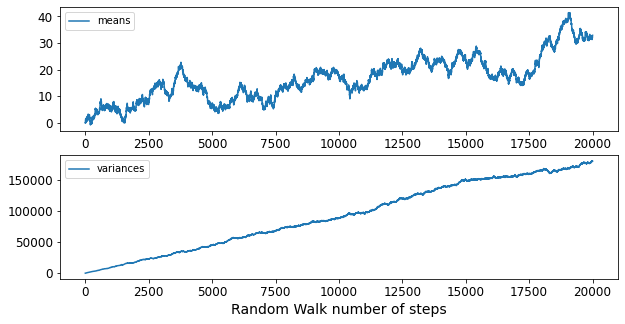

In [11]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,5))
ax1.plot(means,label="means")
ax1.legend()
ax2.plot(variances,label="variances")
ax2.legend()
ax2.set_xlabel("Random Walk number of steps")

In [12]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [13]:
X=np.array(range(len(variances))).reshape(-1, 1)
y=np.array(variances).reshape(-1, 1)
X.shape,y.shape

((20000, 1), (20000, 1))

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
print(model.coef_,model.intercept_)
print('The variance: ',np.sqrt(model.coef_))

[[9.26041256]] [-121.96893555]
In units of std**2 [[1.02893473]] [-121.96893555]
Multiplied by the unit std**2 results in you coefficient:  [[9.26041256]]
The variance:  [[3.0430926]]


As expected model coefficient is very close to the variance=std**2 of the used normal distribution in 
WN=np.random.normal(loc=dist_centre,size=n_draws,scale=std)

Text(0.5, 0, 'Random Walk number of steps')

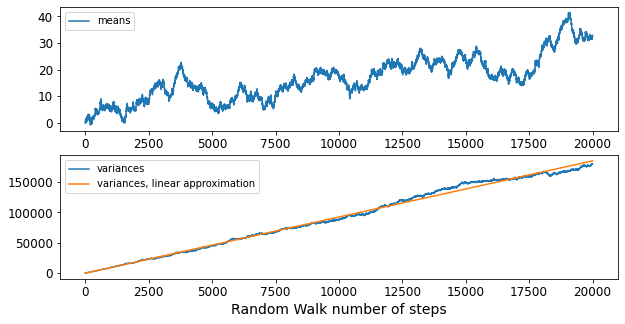

In [16]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,5))
ax1.plot(means,label="means")
ax1.legend()
ax2.plot(variances,label="variances")
ax2.plot(X*model.coef_+model.intercept_,label="variances, linear approximation")
ax2.legend()
ax2.set_xlabel("Random Walk number of steps")

# Part II (Homework)

## (i) Generate a stochastic process: temperature time series in K for months t in 1:nt, with nt=120

 $X[t] = alpha * ( X[t-1]-mu[t-1] ) + eta[t] + mu[t]$
 
 with $mu[t] = a0 + a1 * t + a2 * cos(2*pi*t/12) + a3 * sin(2*pi*t/12)$  
 
 choose for the modell:  
 $a0=283.15$  
 $a1=0.01$  
 $a2=10$   
 $a3=0.2$   
 $\alpha=0.2$  
 
 and for $\eta$:  
 $\mu=0$  
 $\sigma=5$

In [17]:
def get_mu(nt,a0,a1,a2,a3):
    mu_arr = np.zeros(nt)
    time_arr = np.arange(nt)
    mu_arr = a0+a1*time_arr+a2*np.cos((2*np.pi*time_arr)/12) \
                  +a3*np.sin((2*np.pi*time_arr)/12)

    return mu_arr

In [18]:
def get_Xt(alpha,nt,x0,mu,sigma):
    WN_arr = np.random.normal(loc=mu,scale=sigma,size=nt)
    mu_arr =  get_mu(nt,a0,a1,a2,a3)
    x_arr  = np.zeros(nt)
    # set initial x
    x_arr[0] = x0
    # from 2nd to the last month
    
    for i in range(1,nt):
        x_arr[i] = alpha*(x_arr[i-1]-mu_arr[i-1])+WN_arr[i]+mu_arr[i]
        
    return x_arr, WN_arr, mu_arr

In [19]:
# MU(t) PARAMS

a0=283.15
a1=0.01  
a2=10
a3=0.2  
a_list=[a0,a1,a2,a3]
alpha=0.2
# WHITE NOISE PARAMS
mu=0
sigma=5
# X(t) PARAMS
x0=a0 # Temperature initial condition
nt=120 # each timestep is a month

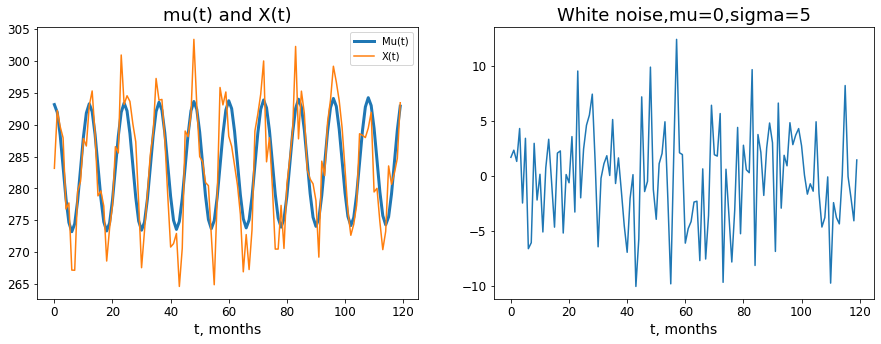

In [20]:
# generate X(t), eta(t) - white noise, Mu(t)
x_arr, WN_t, mu_t = get_Xt(alpha,nt,x0,mu,sigma)
# plot the resulting arrays
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(mu_t,label='Mu(t)',linewidth=3)
ax1.plot(x_arr,label='X(t)')
ax1.set_title("mu(t) and X(t)")
ax1.legend()

ax2.plot(WN_t)
ax2.set_title(f'White noise,mu={mu},sigma={sigma}');
[ax.set_xlabel("t, months") for ax in [ax1,ax2]];


##  Estimate the parameter a0, a1, a2 and a3
Use the methods from exercise 1!  
Define h0 (offset), h1 (trend), h2 (cos) and h3 (sin)  
Build a matrix H and calculate $\vec{a}$ = $(H^TH)^{-1}H^T\vec{X}$ 

In [21]:
time_arr = np.arange(nt)
h0 = np.ones(nt)
h1 = time_arr
h2 = np.cos((2*np.pi*time_arr)/12)
h3 = np.sin((2*np.pi*time_arr)/12)
H=np.stack([h0,h1,h2,h3],axis=1)

In [22]:
# least square solution of linear inverse problem X=Ha
from scipy.linalg import det, inv, eig
a=inv(H.T@H)@H.T@x_arr
[ print(f'estimated a{i} = {a[i]:.3f} /// true a{i} ={a_list[i]}') for i in range(len(a))];

estimated a0 = 282.862 /// true a0 =283.15
estimated a1 = 0.009 /// true a1 =0.01
estimated a2 = 11.107 /// true a2 =10
estimated a3 = -0.408 /// true a3 =0.2


In [23]:
# -----------------------------------------
# Here not necessary, just the coefficients 'a' for one run are needed here and you already have them calculated above.
# -----------------------------------------

# using sklearn library
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(H, x_arr)
a[0]=model.intercept_
a[1:]=model.coef_[1:]
[ print(f'estimated a{i} = {a[i]:.3f} /// true a{i} ={a_list[i]}') for i in range(len(a))];

estimated a0 = 282.862 /// true a0 =283.15
estimated a1 = 0.009 /// true a1 =0.01
estimated a2 = 11.107 /// true a2 =10
estimated a3 = -0.408 /// true a3 =0.2


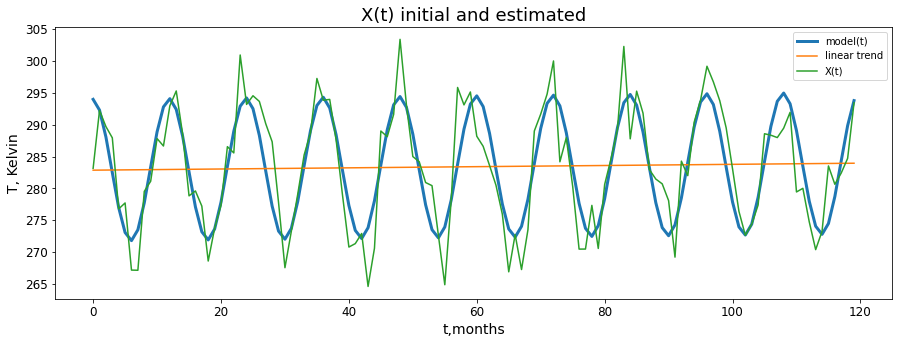

In [24]:
# ------------------------------------------
# Also not necessray, but nice to see ;)
# --------------------------------------------

model = a[0]*h0 + a[1]*h1 + a[2]*h2 + a[3]*h3

fig,(ax1) = plt.subplots(1,1,figsize=(15,5))
ax1.plot(model,label='model(t)',linewidth=3)
ax1.plot(a[0]*h0 + a[1]*h1,label='linear trend')
ax1.plot(x_arr,label='X(t)')
ax1.set_ylabel('T, Kelvin')
ax1.set_xlabel('t,months')
ax1.set_title('X(t) initial and estimated')
ax1.legend();


## (ii) Derive sample uncertainty as standard deviation of a estimates over sample of processes and compare this to the uncertainty as given by a linear modelling/linear regression function

Tip:  
Set the number of samples to 1000 and generate such many stochastic processes. For each sample calculate the the a0, a1, a2 and a3 with the method $\vec{a}$ = $(H^TH)^{-1}H^T\vec{X}$  and store them in a matrix A. You should end up haven 1000 of each a. Calculate the standard deviation for each a.  

As a given linear regression function you can use OLS from the library statsmodels.api

In [43]:
# -----------------------------------------
# Matrix calculation for the a would have been nicer for you to see the simmilarities and differences between
# calculating everything by hand or using functions containing many mathods.
# -----------------------------------------

LRmodel = linear_model.LinearRegression()

# empty array to fill out
nproc=1000
A=np.ndarray([nproc,4])

for iteration in range(nproc):
    # generate stochastic process
    x_arr, WN_t, mu_t = get_Xt(alpha,nt,x0,mu,sigma)
    # pack guess patterns into H
    time_arr = np.arange(nt)
    h0 = np.ones(nt)
    h1 = time_arr
    h2 = np.cos((2*np.pi*time_arr)/12)
    h3 = np.sin((2*np.pi*time_arr)/12)
    H=np.stack([h0,h1,h2,h3],axis=1)
    # apply linear regression to get a coefficients
    #LRmodel.fit(H, x_arr)
    a_cr = inv(H.T@H)@H.T@x_arr
    #a[0]=LRmodel.intercept_
    #a[1:]=LRmodel.coef_[1:]
    # append 4 a coefficients at every step
    A[iteration]=a_cr
    

In [44]:
#-----------------------------------------------
# This methods seems not to give you also relevant parameter like i.e. the standard deviation, stderr.
# Without such parameter it is much harder for you to figure out if your model is either good or bad.
# For sure you can calculate the stderr by your self, but you can avoid this by using functions that do it for you.
# ---------------------------------------------

In [45]:
Avars = np.zeros(A.shape[1])
Ameans = np.zeros(A.shape[1])

# for each index calculate variance and mean
for a_ind in range(A.shape[1]):
    amean_deviations=np.zeros(A.shape[0])
    amean = A[:,a_ind].mean()
    Ameans[a_ind] = amean
    # calculate deviation from the mean for each of 1000 
    # generated processes
    for proc_ind in range(A.shape[0]):
        amean_deviations[proc_ind] = A[proc_ind,a_ind]-amean
        
    varaince = np.mean(amean_deviations**2)
    Avars[a_ind] = varaince

In [46]:
[ print(f'mean a{i} = {Ameans[i]:.3f} /// std a{i} ={np.sqrt(Avars[i])}') for i in range(len(a))];

mean a0 = 282.807 /// std a0 =1.1440977497640064
mean a1 = 0.014 /// std a1 =0.016284599624410406
mean a2 = 9.779 /// std a2 =0.7858444026053305
mean a3 = 0.137 /// std a3 =0.799672872118242


Conclusion: a0 and a2 defined best of all. Linear trend a1 is itself small and thus can not be determined reliably condsidering std of a1. Indeed in some rund I even got the negative a1 coefficients for linear trend. 

In [50]:
# ----------------------------------------------
# By the use of a function from a library:
# ----------------------------------------------
import statsmodels.api as sm
H_sm = sm.add_constant(H)
estimate = sm.OLS(x_arr, H_sm)
est_result = estimate.fit()
print(est_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     49.74
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           9.62e-21
Time:                        08:04:36   Log-Likelihood:                -374.46
No. Observations:                 120   AIC:                             756.9
Df Residuals:                     116   BIC:                             768.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        282.8964      1.014    278.951      0.0

# Remarks
A very good exercise, thanks. Just a few remarks.
In the last part where you calculate the 1000 samples it would have been better to use the matrix notation to calculate the a coefficients. Then you can calculate the mean and stderr of them and compare those values with coefficients and stderr you get from functions provided by libraries.
The function from sklearn is not the best one to use for this task as it does not have an option to show you the uncertainties, thus you have to calculate them by yourself. Same is true for other parameter like p-values. You also can calculate them by yourself, but then you would end up writing your own library function, other have already done this for you ;)
Also you should keep in mind that ready-to-use functions often uses approximations to calculate faster. This will be beneficial when it comes to very large data.